In [15]:
import os
import sys
import numpy as np
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris, load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import pandas as pd
import matplotlib.pyplot as plt
import plotnine as gg
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm
import seaborn

In [11]:
os.getcwd()

'/Users/habbasi'

In [40]:
path = '/Users/habbasi/Desktop/backend'
file = os.path.join(path, 'BR00100037_normalized_variable_selected.csv')
data = pd.read_csv(file)
data.head()

df = data.groupby('Metadata_broad_sample')['Metadata_cell_line'].count()
df

# metacol = data.columns.str.contains('Metadata')
# var = data.loc[:, ~metacol]
# compound = pd.DataFrame(data['Metadata_broad_sample'])
# #df = pd.concat([compound, var], ignore_index=True)
# df = compound.merge(var, left_index=True, right_index=True)

# # Aggregating mean profiles per Metadata_Broad_sample
# df_merge = df.groupby('Metadata_broad_sample').mean()
# df_merge = df_merge.rename_axis('Metadata_broad_sample').reset_index()
# df_merge.head()

# sample_var = df_merge.columns.str.contains('Metadata')
# var_selected = df_merge.loc[:, ~sample_var]
# var_selected.head()

Metadata_broad_sample
BRD-A15435692-003-02-3      4
BRD-K90789829-001-07-8      4
BRD-K97309399-001-09-4      4
BRD-K97963946-001-01-3      4
BRD-U14034701-000-01-8      8
BRD-U19661578-000-01-3      8
BRD-U28050554-000-01-6      8
BRD-U32271674-000-01-7      8
BRD-U43181200-000-01-8      8
BRD-U45215812-000-01-2      8
BRD-U64054712-000-01-2      8
BRD-U68785813-000-01-5      8
BRD-U70043513-000-01-8      8
BRD-U70105429-000-01-8      8
BRD-U80404001-000-01-9      8
BRD-U91836982-000-01-2      8
DMSO                      272
Name: Metadata_cell_line, dtype: int64

## Calculation of Correlations (pearson, kendall, spearman)
# algorithm: 'peason, 'kendall', and 'spearman' are supported.


In [35]:
corr_df = var_selected.corr(method='pearson')
corr_df.head()


,Cells_AreaShape_Area,Cells_AreaShape_Compactness,Cells_AreaShape_Eccentricity,Cells_AreaShape_Extent,Cells_AreaShape_FormFactor,Cells_AreaShape_Solidity,Cells_AreaShape_Zernike_0_0,Cells_AreaShape_Zernike_2_0,Cells_AreaShape_Zernike_3_1,Cells_AreaShape_Zernike_3_3,...,Nuclei_Texture_SumAverage_Mito_5_0,Nuclei_Texture_SumAverage_RNA_20_0,Nuclei_Texture_SumEntropy_DNA_10_0,Nuclei_Texture_SumEntropy_DNA_20_0,Nuclei_Texture_SumEntropy_DNA_5_0,Nuclei_Texture_SumEntropy_RNA_5_0,Nuclei_Texture_SumVariance_DNA_20_0,Nuclei_Texture_Variance_ER_20_0,Nuclei_Texture_Variance_Mito_20_0,Nuclei_Texture_Variance_RNA_10_0
Cells_AreaShape_Area,1.000000,0.343524,0.461834,-0.543471,-0.807983,-0.673492,-0.647102,-0.168919,0.494138,-0.592205,...,0.255791,-0.021955,-0.239955,0.244660,-0.493300,-0.480869,0.296782,-0.062320,-0.151811,-0.410449
Cells_AreaShape_Compactness,0.343524,1.000000,0.898083,-0.968770,0.132774,-0.389769,-0.919212,-0.960061,0.787689,-0.771606,...,0.440486,0.859897,0.046063,0.484982,-0.187193,-0.287634,0.665616,0.731194,0.599179,-0.257491
Cells_AreaShape_Eccentricity,0.461834,0.898083,1.000000,-0.880261,-0.034086,-0.478515,-0.935954,-0.842888,0.967497,-0.587692,...,0.245530,0.656856,-0.211463,0.190703,-0.407461,-0.549189,0.417149,0.398037,0.238225,-0.567404
Cells_AreaShape_Extent,-0.543471,-0.968770,-0.880261,1.000000,0.100585,0.540825,0.967462,0.878560,-0.776942,0.855171,...,-0.507300,-0.745821,-0.036286,-0.540601,0.239243,0.331888,-0.693128,-0.647733,-0.511484,0.282748
Cells_AreaShape_FormFactor,-0.807983,0.132774,-0.034086,0.100585,1.000000,0.720535,0.226129,-0.351068,-0.098134,0.268164,...,-0.174783,0.501545,0.246165,-0.030065,0.391834,0.364788,0.065472,0.492325,0.538122,0.314186


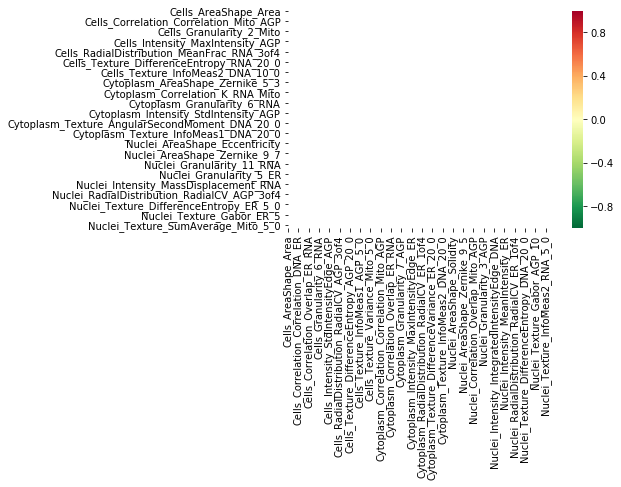

In [36]:
# Create a mask to display only the lower triangle of the matrix (since it's mirrored around its 
# top-left to bottom-right diagonal).
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
# Create the heatmap using seaborn library. 
# List if colormaps (parameter 'cmap') is available here: http://matplotlib.org/examples/color/colormaps_reference.html
seaborn.heatmap(corr_df, cmap='RdYlGn_r', vmax=1.0, vmin=-1.0 , mask = mask, linewidths=2.5)
 
# Show the plot we reorient the labels for each column and row to make them easier to read.
plt.yticks(rotation=0) 
plt.xticks(rotation=90) 
plt.show()

# Data Parsing

In [ ]:

filter_A549 = (data.Metadata_Plate == 'BR00100032') | (data.Metadata_cell_line == 'A549')
filter_U2oS  = (data.Metadata_Plate == 'BR00100037') | (data.Metadata_cell_line == 'U2oS')

data_A549 = data[filter_A549]
data_U2oS = data[filter_U2oS]

metacol_A549 = data_A549.columns.str.contains('Metadata')
metacol_U2oS = data_U2oS.columns.str.contains('Metadata')

var_A549 = data_A549.loc[:, ~metacol_A549]
compound_A549 = pd.DataFrame(data_A549['Metadata_broad_sample'])

var_U2oS = data_U2oS.loc[:, ~metacol_U2oS]
compound_U2oS = pd.DataFrame(data_U2oS['Metadata_broad_sample'])

df_A549 = compound_A549.merge(var_A549, left_index=True, right_index=True)
df_A549_merge = df_A549.groupby('Metadata_broad_sample').mean()

df_U2oS = compound_U2oS.merge(var_U2oS, left_index=True, right_index=True)
df_U2oS_merge = df_U2oS.groupby('Metadata_broad_sample').mean()


# For combining merging two cell lines

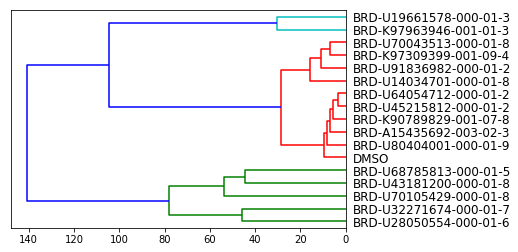

In [218]:


Z_A549 =sch.linkage(df_A549_merge, 'ward')
fig = dendrogram(Z_A549, leaf_rotation=0, orientation="left", labels=df_A549_merge.index)
plt.savefig('/Users/habbasi/Desktop/Gray_dendogram_A549.pdf', bbox_inches='tight') 


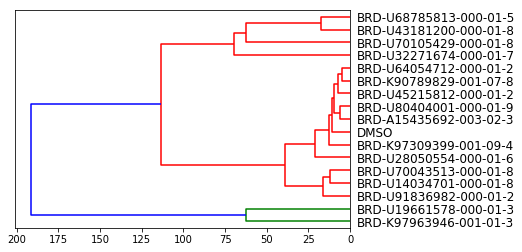

In [219]:
Z_U2oS =sch.linkage(df_U2oS_merge, 'ward')
fig = dendrogram(Z_U2oS, leaf_rotation=0, orientation="left", labels=df_U2oS_merge.index)
plt.savefig('/Users/habbasi/Desktop/Gray_dendogram_U2oS.pdf', bbox_inches='tight') 

In [ ]:
Z=sch.linkage(df_merge, 'ward')
fig = dendrogram(Z, leaf_rotation=0, orientation="left", labels=df_merge.index)
# my_palette = plt.cm.get_cmap("Accent", 3)
# test['Metadata_broad_sample'] = pd.Categorical(test['Metadata_broad_sample'])
plt.savefig('/Users/habbasi/Desktop/Gray_dendogram.pdf', bbox_inches='tight') 

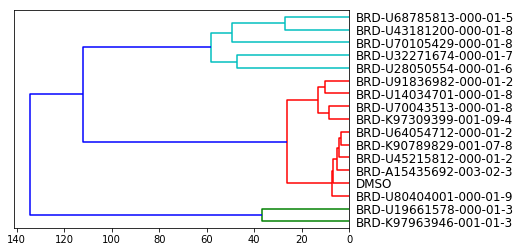

In [184]:
Z=sch.linkage(df_merge, 'ward')
fig = dendrogram(Z, leaf_rotation=0, orientation="left", labels=df_merge.index)
# my_palette = plt.cm.get_cmap("Accent", 3)
# test['Metadata_broad_sample'] = pd.Categorical(test['Metadata_broad_sample'])
plt.savefig('/Users/habbasi/Desktop/Gray_dendogram.pdf', bbox_inches='tight') 

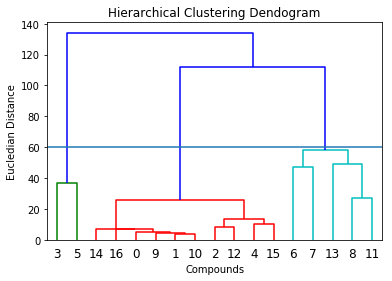

In [189]:
fig = sch.dendrogram(sch.linkage(df_merge, method ='ward'))
plt.title('Hierarchical Clustering Dendogram')
plt.xlabel('Compounds')
plt.ylabel('Eucledian Distance')
plt.axhline(y=60)
plt.savefig('/Users/habbasi/Desktop/Gray_dendogram_top.pdf', bbox_inches='tight') 

In [227]:
Y=pdist(df_merge, 'correlation')

NameError: name 'pdist' is not defined

In [ ]:
df_merge['cyl']=pd.Categorical(df['cyl'])
my_color=df['cyl'].cat.codes


In [81]:

labels = sch.fcluster(Z, 60, criterion='distance' )
print(labels)


[2 2 2 1 2 1 3 3 3 2 2 3 2 3 2 2 2]


In [86]:
pairs = pd.DataFrame({'labels': labels, 'sample': sample})
print(pairs.sort_values('labels'))


     labels                  sample
100       1  BRD-U45215812-000-01-2
122       1  BRD-U70043513-000-01-8
0         2                    DMSO
171       2  BRD-U19661578-000-01-3
149       2  BRD-K90789829-001-07-8
147       2  BRD-U80404001-000-01-9
146       2  BRD-U70105429-000-01-8
172       2  BRD-U43181200-000-01-8
173       2  BRD-A15435692-003-02-3
101       2  BRD-K97309399-001-09-4
99        2  BRD-U64054712-000-01-2
98        2  BRD-U91836982-000-01-2
123       3  BRD-U14034701-000-01-8
148       3  BRD-U68785813-000-01-5
170       3  BRD-U28050554-000-01-6
124       3  BRD-U32271674-000-01-7
125       3  BRD-K97963946-001-01-3


In [20]:
Y=pdist(df_merge, 'correlation')